In [1]:
import sys
import numpy as np

from pyDFCSR_2D.CSR import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file='input/FACETII_BC14_config.yaml')
testCSR.CSR_params.compute_CSR = 1


start reinterpolation. number of slice 1
xbins = 500  zbins =  500


In [3]:
testCSR.run(debug = False)


Starting the DFCSR run
SBend(L=0.05, P0C=4433064106.61884, G=-0.076334651, DG=0.0, E1=0.0, E2=0.0, FINT=0.633, HGAP=0.016675, FINTX=0.633, HGAPX=0.016675, FRINGE_AT='no_end', FRINGE_TYPE='linear_edge', TILT=0.0)
Wakes written to  C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\BC14-2025-01-16T17_20_27-08_00-wakes.h5
Finish step 1, s = 0.05,  in 2.729727029800415 seconds
SBend(L=0.05, P0C=4433064106.61884, G=-0.076334651, DG=0.0, E1=0.0, E2=0.0, FINT=0.633, HGAP=0.016675, FINTX=0.633, HGAPX=0.016675, FRINGE_AT='no_end', FRINGE_TYPE='linear_edge', TILT=0.0)
Finish step 2, s = 0.1,  in 1.8150274753570557 seconds
SBend(L=0.05, P0C=4433064106.61884, G=-0.076334651, DG=0.0, E1=0.0, E2=0.0, FINT=0.633, HGAP=0.016675, FINTX=0.633, HGAPX=0.016675, FRINGE_AT='no_end', FRINGE_TYPE='linear_edge', TILT=0.0)
Finish step 3, s = 0.15000000000000002,  in 1.850970983505249 seconds
SBend(L=0.05, P0C=4433064106.61884, G=-0.076334651, DG=0.0, E1=0.0, E2=0.0, FINT=0.633, HGAP=0.016675, FINT

## Parallel Run with MPI

In [ ]:
import pyDFCSR_mpi_run

In [ ]:
# input yaml file in "./input/dipole_config.yaml"
#salloc --partition milano --account ad:beamphysics -N 1 -n 10 /usr/lib64/openmpi/bin/mpirun python  -m pyDFCSR_mpi_run ./input/dipole_config.yaml
!mpirun -n 4 python  -m pyDFCSR_mpi_run.py ./input/chicane_config.yaml

## Plot Output

In [4]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'BC14-2025-01-16T17_20_27-08_00',
                             work_dir = './output')

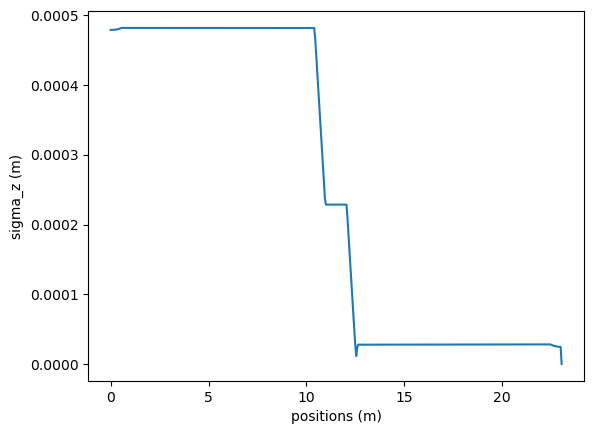

In [5]:
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'sigma_z', show_plot = True)

plot longitudinal wakes at nearest point s  = 12.850000000000003 m, step count 257
ebeam energy 4433064106.61884


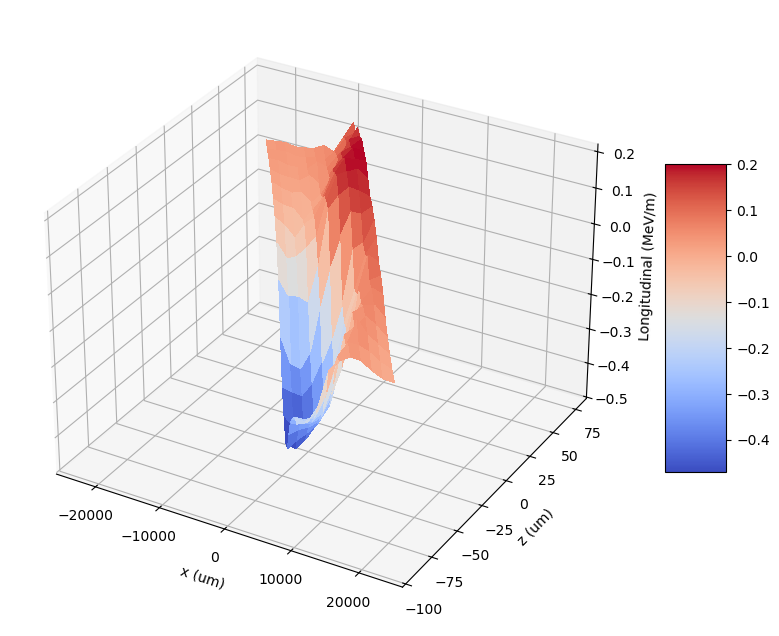

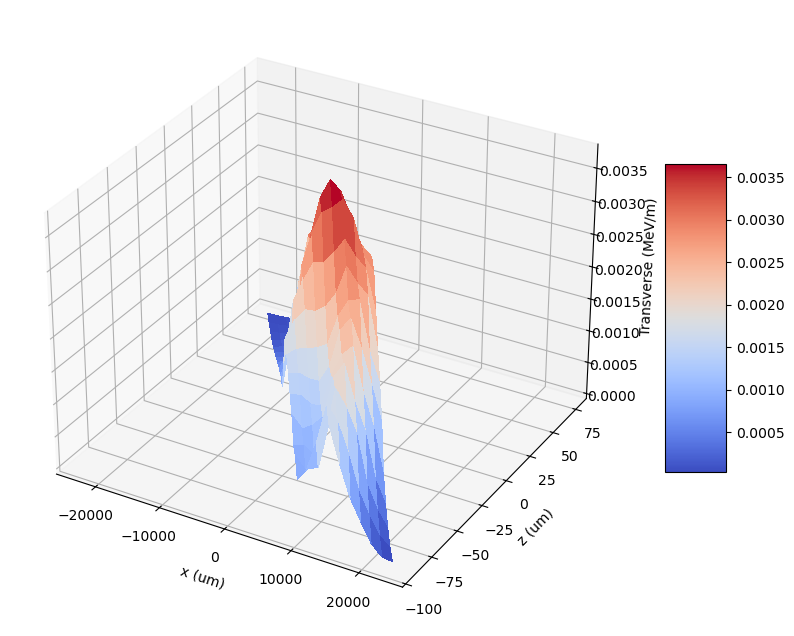

In [27]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s =12.9, show_plot = True)

Reading  C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\BC14-2025-01-16T17_20_27-08_00-particles-end.h5


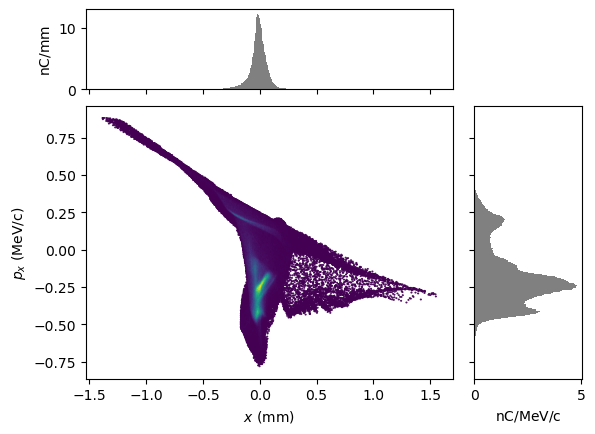

In [14]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles()
pg.plot('x', 'px')

In [15]:
pg.twiss()

{'alpha_x': 0.3035240504380398,
 'beta_x': 3.004601117254987,
 'gamma_x': 0.3634848043297289,
 'emit_x': 3.6713918712235295e-09,
 'eta_x': -0.0027757066773292168,
 'etap_x': 0.0021931421282053772,
 'norm_emit_x': 3.186247892229998e-05}

Reading  C:\Users\yingb\PycharmProjects\pyDFCSR\pyDFCSR_2D\example\output\BC14-2025-01-16T17_20_27-08_00-particles-end.h5


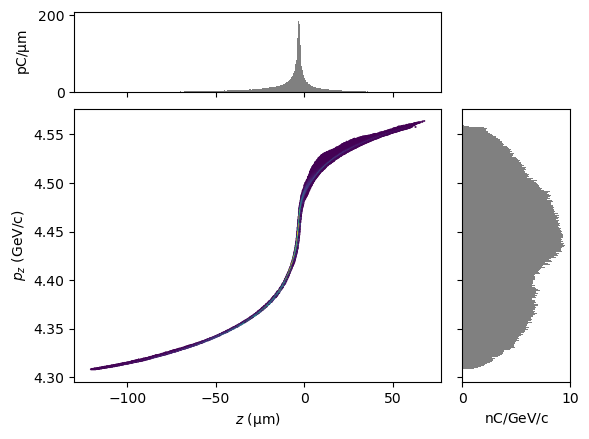

In [13]:
pg  = DFplot.get_particles()
pg.plot('z', 'pz')


In [4]:
40e-12/1.6e-13 

249.99999999999997

In [5]:
200/1200

0.16666666666666666

In [29]:
from pmd_beamphysics import ParticleGroup
# H5File = 'data/bmad_particles2.h5'
H5FILE = "input/particles/BEGBC14E.h5"
# H5FILE = 'data/astra_particles.h5'

P = ParticleGroup(H5FILE)


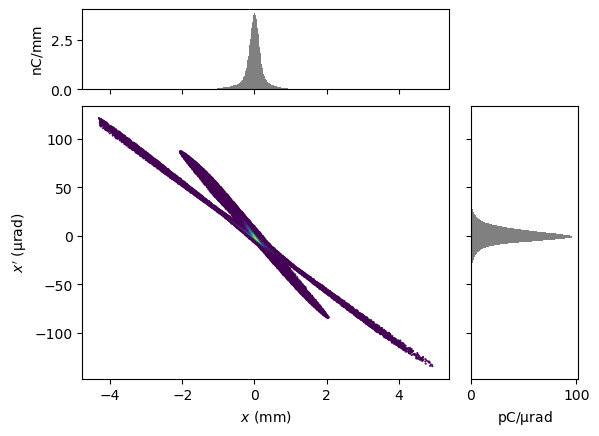

In [33]:
P.plot('x', 'xp')

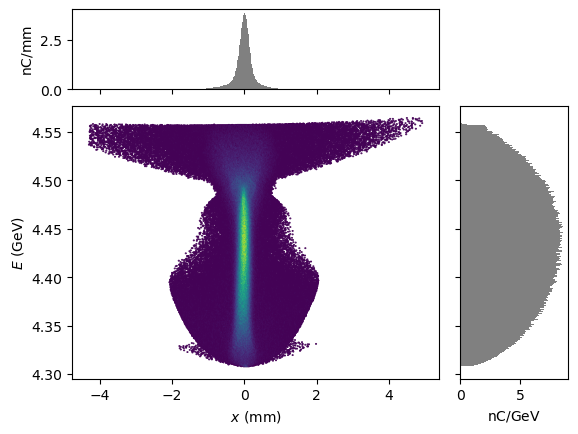

In [32]:
P.plot('x', 'energy')